# Dataset Description

The dataset below represents the cusumption of avacado. Avocado is a fruit consumed by people heavily in the United States. 
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels:

>grocery,
>mass,
>club,
>drug,
>dollar and military. 

The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

In [1]:
# Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.shape

(18249, 14)

In [6]:
# fiding null values present in the dataset.

In [7]:
print(df.isna().sum())

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [8]:
#dropping the null values if presernt in the dataset.

In [9]:
df=df.dropna()
df.shape

(18249, 14)

<AxesSubplot:>

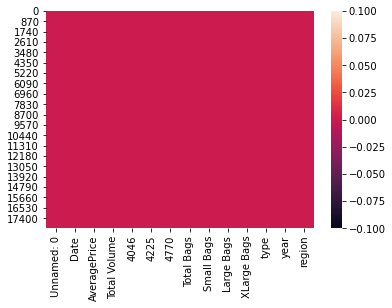

In [10]:
sns.heatmap(df.isnull())

The heatmap above represents the null values present in the dataset. There are no null values present in the dataset.

#### Here, we are performing feature engineering.

In [11]:
''' We are dropping following columns to resolve the multicolinearity in the dataset '''

df.drop(columns=["4046"],inplace=True)

df.drop(columns=["4225"],inplace=True)

df.drop(columns=["4770"],inplace=True)

df.drop(columns=["Small Bags"],inplace=True)

df.drop(columns=["Large Bags"],inplace=True)

df.drop(columns=["XLarge Bags"],inplace=True)

df.drop(columns=["Date"],inplace=True)

### Encoding

Using Ordinal Encoding technique to convert object values into numerical

In [12]:
df

,Unnamed: 0,AveragePrice,Total Volume,Total Bags,type,year,region
0,0,1.33,64236.62,8696.87,conventional,2015,Albany
1,1,1.35,54876.98,9505.56,conventional,2015,Albany
2,2,0.93,118220.22,8145.35,conventional,2015,Albany
3,3,1.08,78992.15,5811.16,conventional,2015,Albany
4,4,1.28,51039.60,6183.95,conventional,2015,Albany
...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,13498.67,organic,2018,WestTexNewMexico
18245,8,1.71,13888.04,9264.84,organic,2018,WestTexNewMexico
18246,9,1.87,13766.76,9394.11,organic,2018,WestTexNewMexico
18247,10,1.93,16205.22,10969.54,organic,2018,WestTexNewMexico


In [13]:
df.dtypes

Unnamed: 0        int64
AveragePrice    float64
Total Volume    float64
Total Bags      float64
type             object
year              int64
region           object
dtype: object

In [14]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df

,Unnamed: 0,AveragePrice,Total Volume,Total Bags,type,year,region
0,0,1.33,64236.62,8696.87,0.0,2015,0.0
1,1,1.35,54876.98,9505.56,0.0,2015,0.0
2,2,0.93,118220.22,8145.35,0.0,2015,0.0
3,3,1.08,78992.15,5811.16,0.0,2015,0.0
4,4,1.28,51039.60,6183.95,0.0,2015,0.0
...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,13498.67,1.0,2018,53.0
18245,8,1.71,13888.04,9264.84,1.0,2018,53.0
18246,9,1.87,13766.76,9394.11,1.0,2018,53.0
18247,10,1.93,16205.22,10969.54,1.0,2018,53.0


In [15]:
df.dtypes

Unnamed: 0        int64
AveragePrice    float64
Total Volume    float64
Total Bags      float64
type            float64
year              int64
region          float64
dtype: object

## Visualization

### Statistical Summary:

In [16]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,Total Bags,type,year,region
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.396392e+05,0.499918,2016.147899,26.495644
std,15.481045,0.402677,3.453545e+06,9.862424e+05,0.500014,0.939938,15.583788
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000,2015.000000,0.000000
25%,10.000000,1.100000,1.083858e+04,5.088640e+03,0.000000,2015.000000,13.000000
50%,24.000000,1.370000,1.073768e+05,3.974383e+04,0.000000,2016.000000,26.000000
75%,38.000000,1.660000,4.329623e+05,1.107834e+05,1.000000,2017.000000,40.000000
max,52.000000,3.250000,6.250565e+07,1.937313e+07,1.000000,2018.000000,53.000000


From above, we can see the statistical summary of the dataset which shows some important statistical data like standard deviation, mean of the particular column, 25th 50th and 75th percentile, etc.
> Mean is greater than standard deviation in many columns

> The difference between 75th percentile and max is high.

Boxplot gives the outliers present in a particular column.

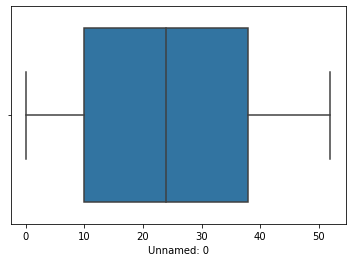

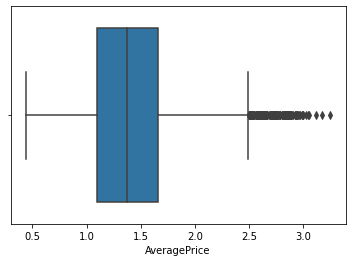

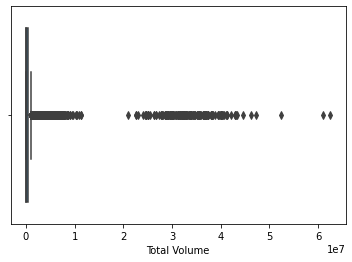

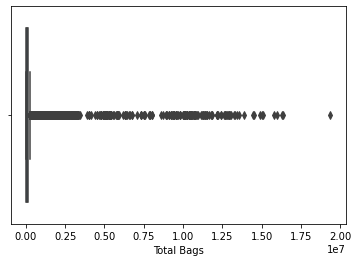

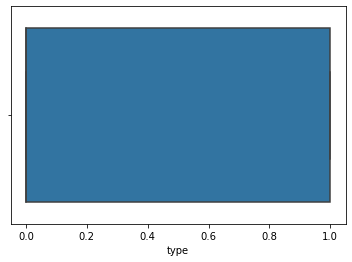

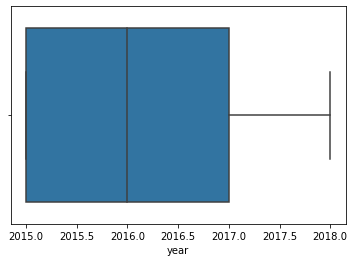

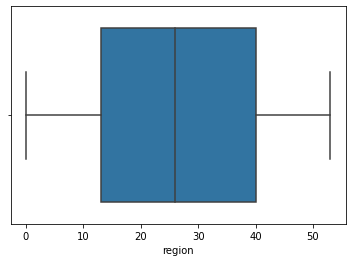

In [17]:
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

distplot shows the columns are normally distributed or not

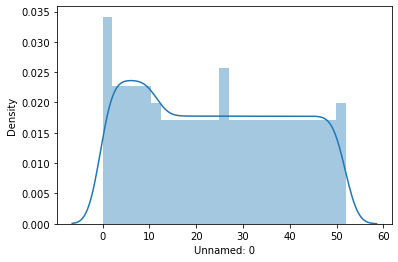

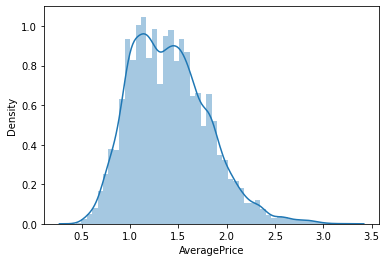

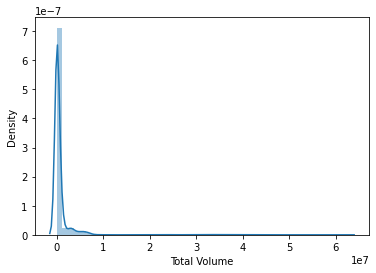

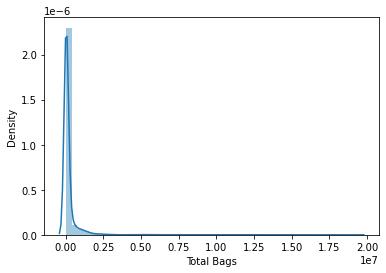

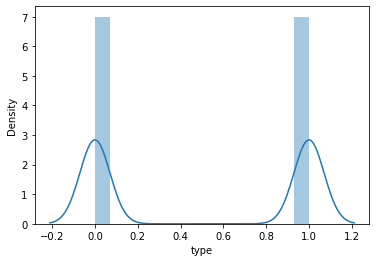

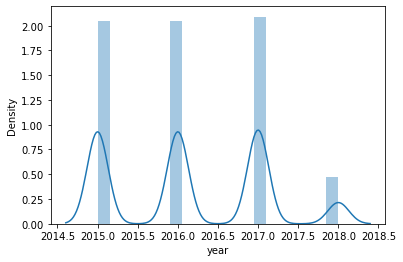

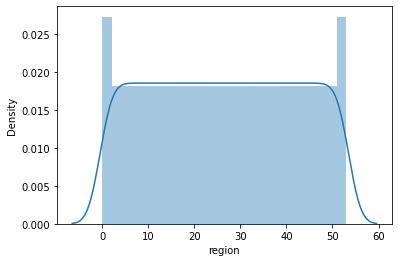

In [18]:

for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

The plot below shows the relationship between Year and Total Volumn

Text(0, 0.5, 'Total Volume')

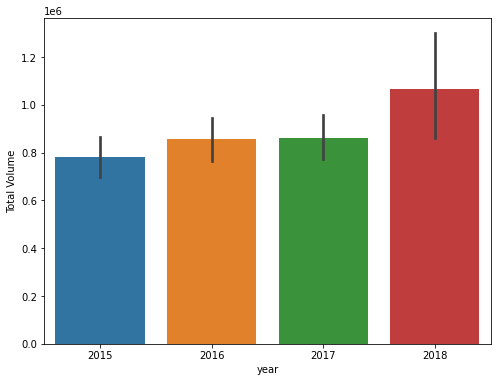

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x="year",y="Total Volume",data=df)
plt.xlabel("year")
plt.ylabel("Total Volume")

Below we can see the distribution of the data from Average price and Frequency columns.

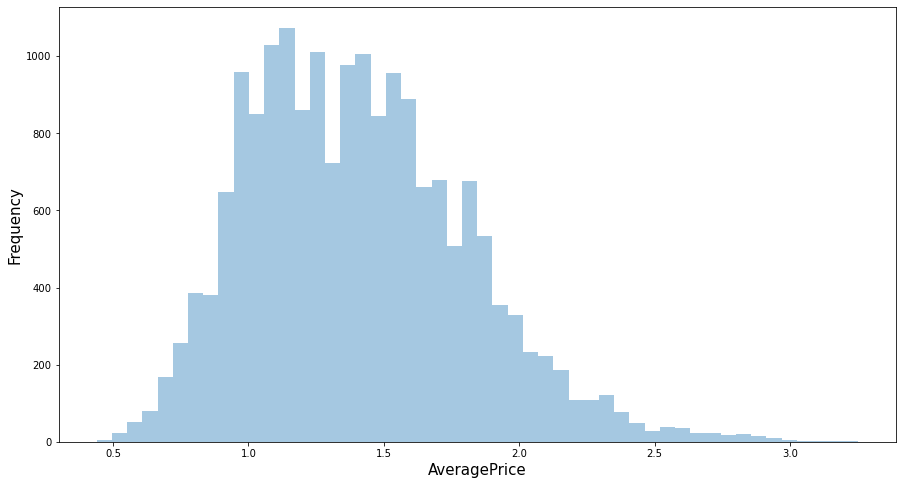

In [20]:
plt.figure(figsize=(15,8))
sns.distplot(df["AveragePrice"],kde=False )
plt.xlabel("AveragePrice", Size=15)
plt.ylabel("Frequency", Size=15)
plt.show()

<Figure size 1080x720 with 0 Axes>

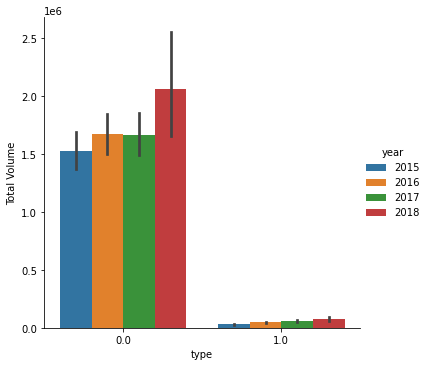

In [21]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="year", kind="bar", data=df)
plt.show()

#### Mulitivariate Analysis:

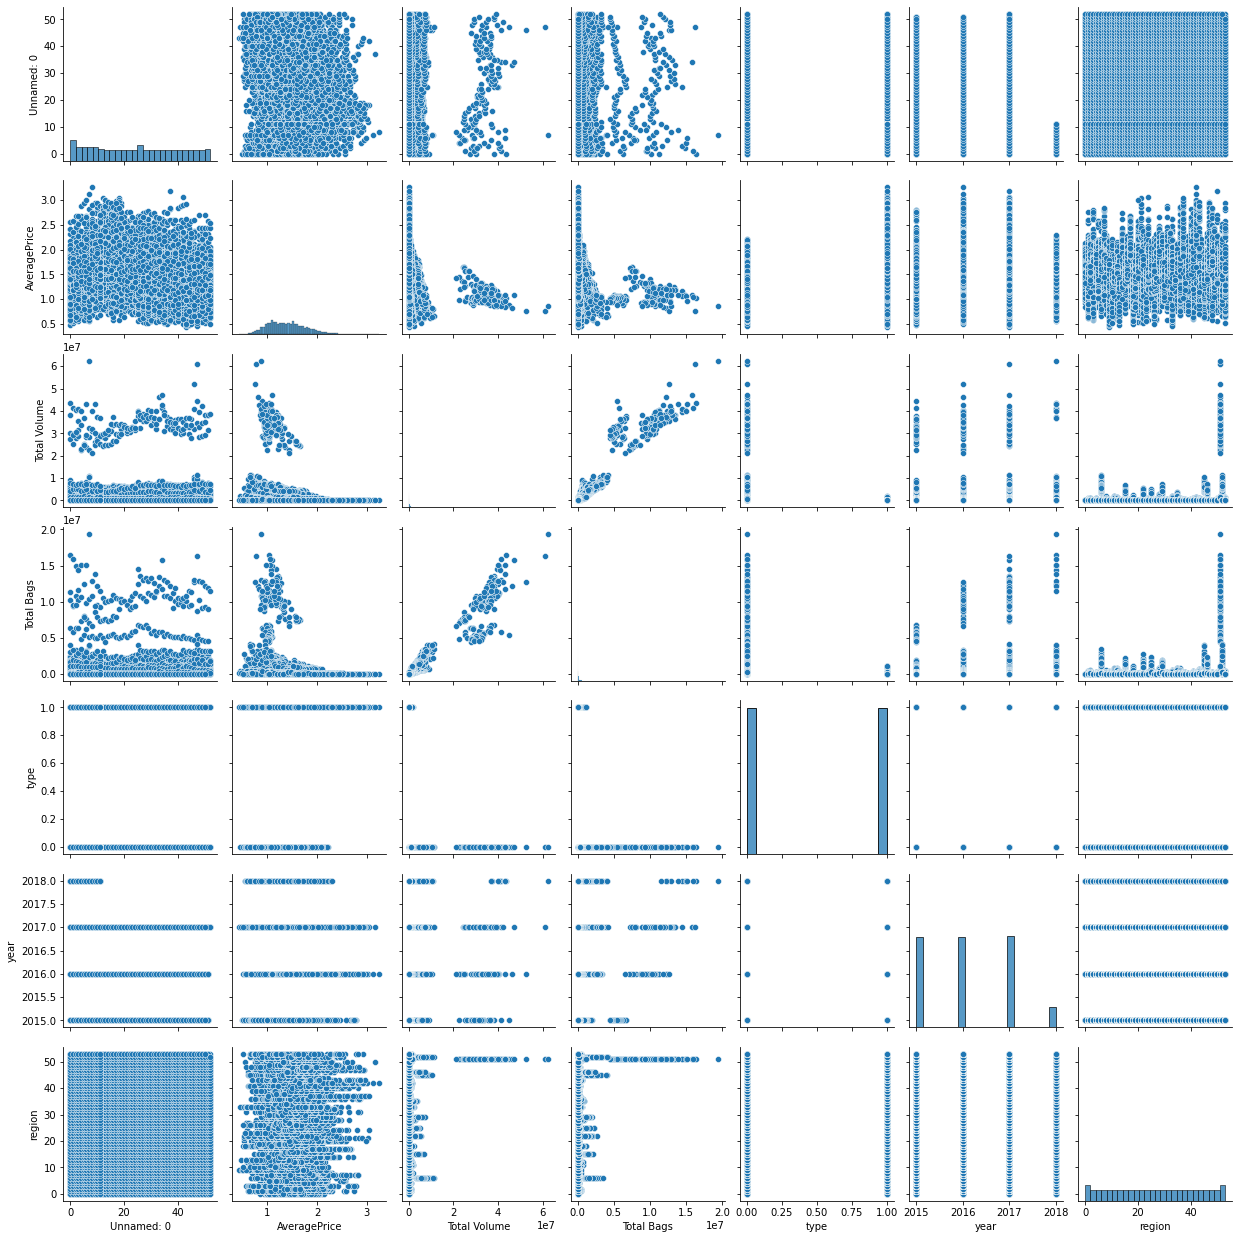

In [22]:
sns.pairplot(df)

### Correlation:

In [23]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,Total Bags,type,year,region
Unnamed: 0,1.000000,-0.133008,0.014035,-0.002219,-0.000288,-0.171667,-0.000489
AveragePrice,-0.133008,1.000000,-0.192752,-0.177088,0.615845,0.093197,-0.011716
Total Volume,0.014035,-0.192752,1.000000,0.963047,-0.232434,0.017193,0.174176
Total Bags,-0.002219,-0.177088,0.963047,1.000000,-0.217788,0.071552,0.175256
type,-0.000288,0.615845,-0.232434,-0.217788,1.000000,-0.000032,-0.000280
year,-0.171667,0.093197,0.017193,0.071552,-0.000032,1.000000,-0.000055
region,-0.000489,-0.011716,0.174176,0.175256,-0.000280,-0.000055,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

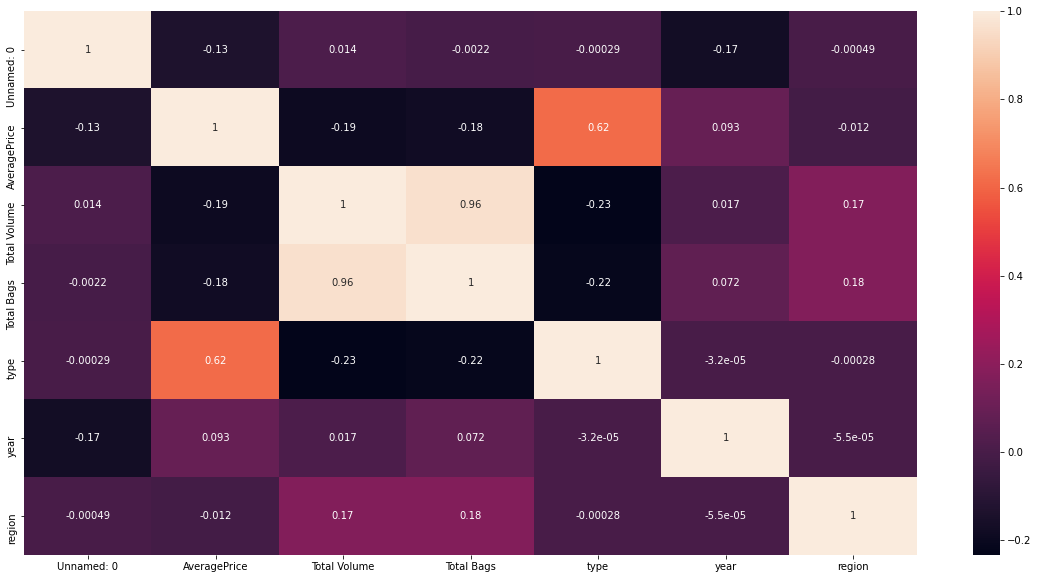

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show

The heatmap represents both the darker and lighter shades for the data. The darker shades represents the negative correlation betweent the two variables as well as the ligher shades represents the positive correlation between the variables.

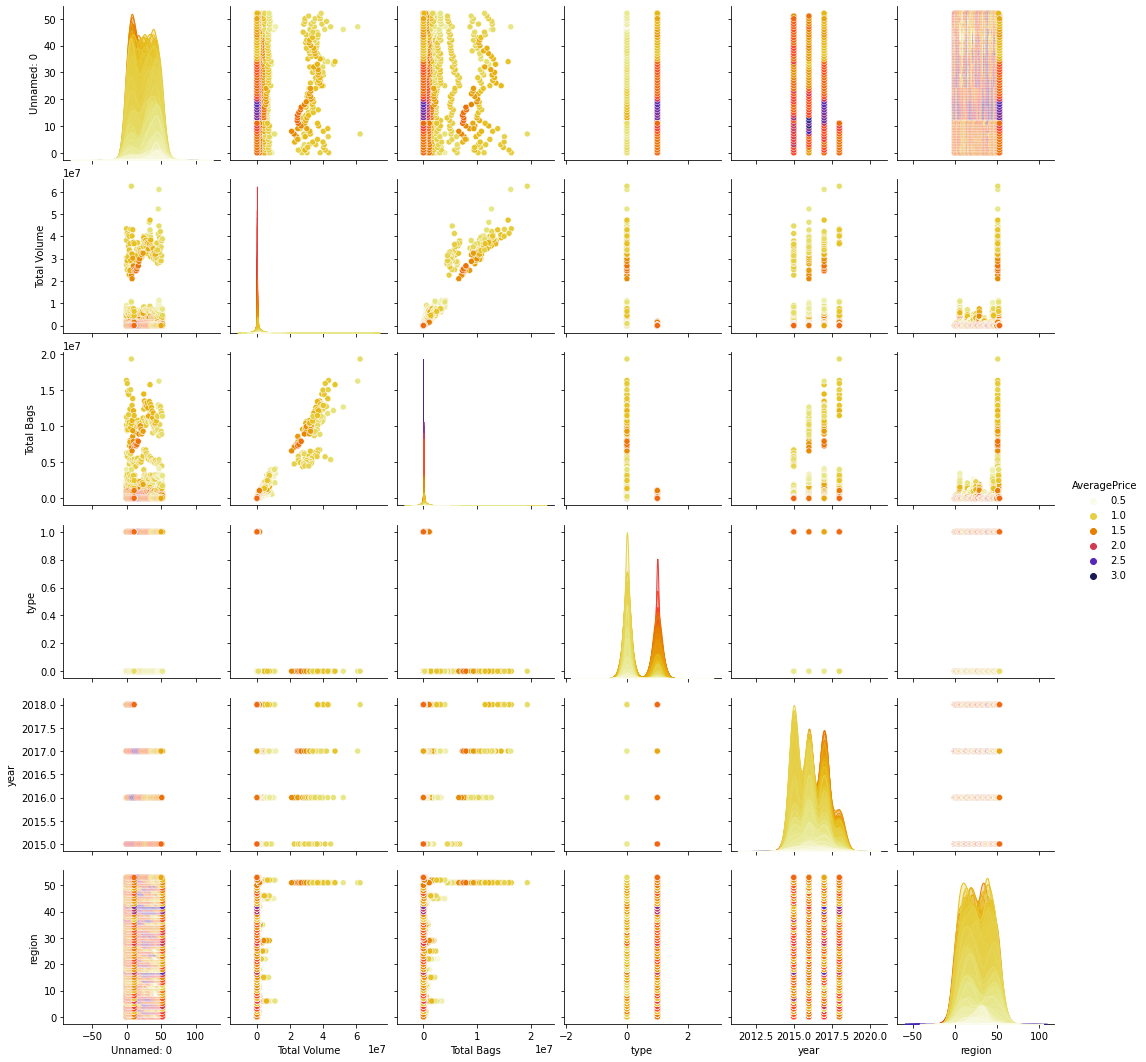

In [25]:
#correleation between the variables using Seaborn's pairplot. 
import seaborn as sns
sns.pairplot(df, hue='AveragePrice', palette='CMRmap_r')

### Removing Outliers:

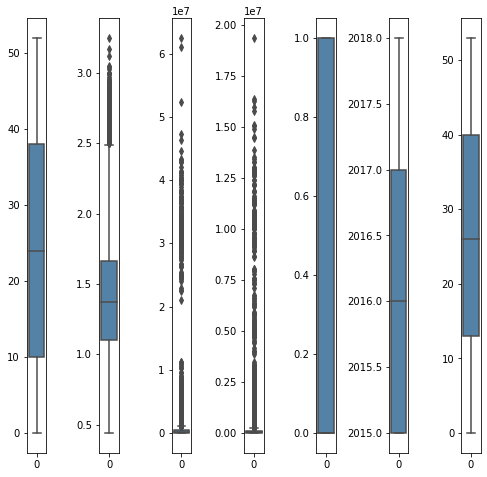

In [26]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='steelblue',orient='v')
    plt.tight_layout()

Using zscore, the outliers are removed from the dataframe. created new dataframe with no null values present in it.

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [28]:
new_df=df[(z<3).all(axis=1)]

In [29]:
new_df.shape

(17931, 7)

In [30]:
df.shape

(18249, 7)

In [31]:
''' Data Loss '''

Data_loss = ((18249-17931)/18279)*100
Data_loss

1.739701296569834

The loss of data after removing the ouliers is 1.73%.

### Skewness:

In [32]:
new_df.skew()

Unnamed: 0      0.101620
AveragePrice    0.388855
Total Volume    3.544630
Total Bags      4.165621
type           -0.005912
year            0.225227
region          0.014808
dtype: float64

Plotting the distribution plot for new dataframe to see the distribution as well as skewness present in the dataset.

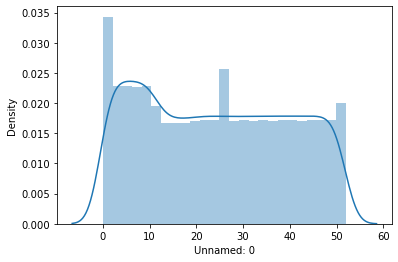

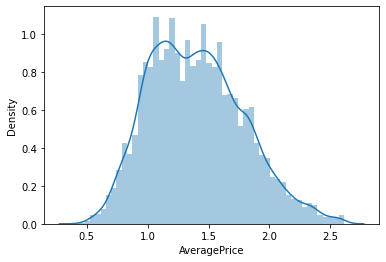

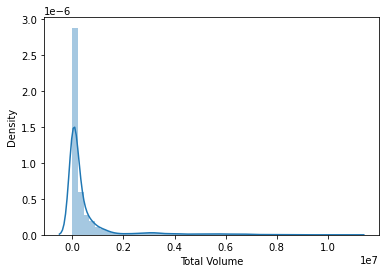

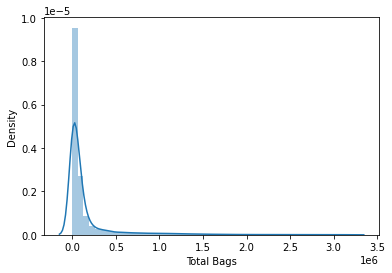

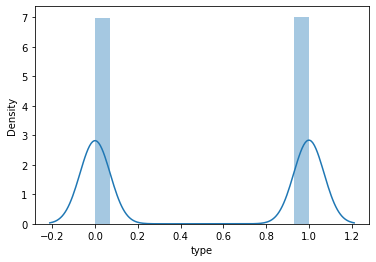

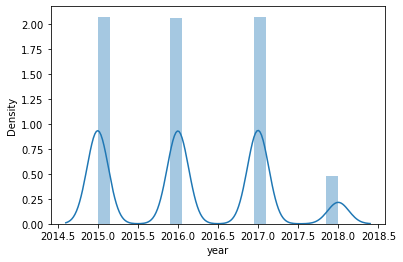

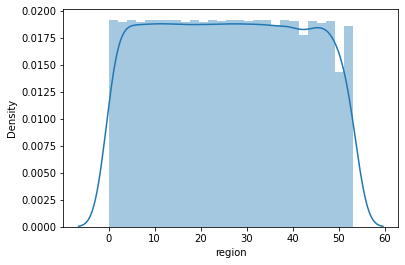

In [33]:
for i in new_df:
    sns.distplot(new_df[i])
    plt.show()

#### Removing Skewness:

In [34]:
from scipy.stats import boxcox
for i in new_df.columns:
    if new_df.skew().loc[i]<-0.55:
        new_df[i]=np.square(new_df[i])

In [35]:
new_df.skew()

Unnamed: 0      0.101620
AveragePrice    0.388855
Total Volume    3.544630
Total Bags      4.165621
type           -0.005912
year            0.225227
region          0.014808
dtype: float64

### Spliting the data into Feature and Target:

In [36]:
x=new_df.drop(['AveragePrice'],axis=1)
y=new_df['AveragePrice']

In [37]:
x.shape

(17931, 6)

In [38]:
y.shape

(17931,)

#### Scalling: 

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [40]:
# importing all the required libraries

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu," on Random_state",maxRS)

Best Accuracy is 0.4346218412784433  on Random_state 174


### Train Test Split the data¶

We got the Best Accuracy is 0.4346218412784433  on Random_state 174. Hence, using these values we are going to train our data using following models :-

[1] Linear Regression

[2] Decision Tree Regressor

[3] Random Forest Regressor

[4] Lasso

[5] KNeighbors Regressor

[6] GradientBoostingRegressor

[7] SVR


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=174)

In [44]:
x_train.shape

(12551, 6)

In [45]:
x_test.shape

(5380, 6)

In [46]:
y_train.shape

(12551,)

In [47]:
y_test.shape

(5380,)

In [48]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)

0.4346218412784433


In [49]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)

0.7615264756467964


In [50]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)

0.882427256822348


In [51]:
ls=Lasso()
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)

-3.129935421131158e-05


In [52]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)

0.7213050843705145


In [53]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)

0.724014332191238


In [54]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)

0.5888958750674851


### Cross Validation:

In [55]:
cvlr=cross_val_score(lr,x,y,cv=5).mean()
print("Cross Validation Score for Linear Regression is : ",cvlr)

Cross Validation Score for Linear Regression is :  -0.022809712330527622


In [56]:
cvdtc=cross_val_score(dtc,x,y,cv=5).mean()
print("Cross Validation Score for Decision Tree Regressor is : ",cvdtc)

Cross Validation Score for Decision Tree Regressor is :  -0.288412319820609


In [57]:
cvrfr=cross_val_score(rfr,x,y,cv=5).mean()
print("Cross Validation Score for Random Forest Regressorr is : ",cvrfr)

Cross Validation Score for Random Forest Regressorr is :  0.11364488935940822


In [58]:
cvls=cross_val_score(ls,x,y,cv=5).mean()
print("Cross Validation Score for Lasso is : ",cvls)

Cross Validation Score for Lasso is :  -1.1671934809126752


In [59]:
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print("Cross Validation Score for KNeighborsRegressor is : ",cvknn)

Cross Validation Score for KNeighborsRegressor is :  -0.012972055118588944


In [60]:
cvgbr=cross_val_score(gbr,x,y,cv=5).mean()
print("Cross Validation Score for Gradient Boosting Regressor is : ",cvgbr)

Cross Validation Score for Gradient Boosting Regressor is :  0.3549514932934789


In [61]:
cvsvr=cross_val_score(svr,x,y,cv=5).mean()
print("Cross Validation Score for SVR is : ",cvsvr)

Cross Validation Score for SVR is :  -0.2461527716984806


### Overfitting & Underfitting:

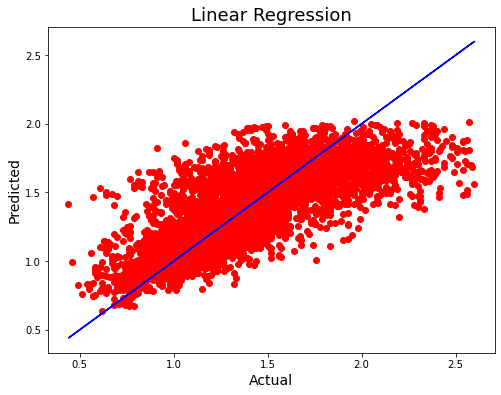

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

### Hyper Parameter Tuning:

We are selecting Gradient Boosting Regressor as our best model as it has least difference between it's Accuracy score and CV score.

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
parameters={"learning_rate":[0.001,0.01,0.1,1],
            "n_estimators":[10,20,50,100],
            "max_depth":[5]}

In [65]:
GCV = GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [66]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [5], 'n_estimators': [10, 20, 50, 100]})

In [67]:
''' Getting the best parameters using GridSearchCV '''

GCV.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [68]:
avo_final=GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=100)
avo_final.fit(x_train,y_train)
pred=avo_final.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

83.43144242816736


### We are getting the model accuracy and cross validation score both as 83.43% which shows our model is performing well.

### Saving the model:

In [69]:
import joblib
joblib.dump(avo_final,"Avacado(submission).pkl")

['Avacado(submission).pkl']

In [70]:
avo_model = joblib.load(open('Avacado(submission).pkl','rb'))
result = avo_model.score(x_test,y_test)
print(result)

0.8343144242816736


In [71]:
Conclusion = pd.DataFrame([avo_model.predict(x_test)[:],gbr.predict(x_test)[:]],index=["Predicted","Original"])

In [72]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,5370,5371,5372,5373,5374,5375,5376,5377,5378,5379
Predicted,1.123920,1.579083,1.532883,1.727328,1.930925,1.168923,1.591397,1.486054,1.710055,1.566633,...,1.698702,1.149264,1.795969,1.606190,1.547484,1.695603,1.225206,2.003477,1.144110,1.058523
Original,1.215215,1.553807,1.618341,1.727710,1.857599,1.101759,1.449124,1.520689,1.766315,1.718626,...,1.593696,1.203751,1.663609,1.659656,1.557699,1.697697,1.202006,1.749455,1.171021,1.081760


Concluding and comparing the Predicted data and Original data based on our model's performance.